In [348]:
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

In [4]:
train_sero = pd.read_csv("./train_sero.csv")
company_start_year = pd.read_csv("./company_start_year.csv")
y = pd.read_csv("./y.csv")

In [38]:
sero_data = pd.read_csv("./data/sero_data.csv")

In [68]:
company_start_year

,company,start_year
0,0,2000
1,1,2000
2,2,2000
3,3,2000
4,4,2000
...,...,...
2186,2186,2014
2187,2187,2014
2188,2188,2015
2189,2189,2011


In [159]:
y

,Id,year,CR,bool
0,0,2000,7.0,False
1,1,2000,7.0,False
2,2,2000,4.0,False
3,3,2000,5.0,False
4,4,2000,5.0,False
...,...,...,...,...
41624,2186,2018,5.0,False
41625,2187,2018,3.0,False
41626,2188,2018,3.0,False
41627,2189,2018,5.0,False


## 데이터 생성
- 원하는 기간만큼의 과거 데이터를 feature로 하여 데이터셋을 만드는 함수

- make dataset2 : 이상치 데이터를 많이 제거하여 데이터셋을 만드는 함수

In [606]:
def make_dataset2(term):
    dataset = y[2191*(term):][:]
    start = True
    x = None
    y["bool"]=[False]*len(y) # y bool 칼럼 False로 초기화
    for idx in range(len(dataset)):
        row = dataset[idx:idx+1]
        company_year = company_start_year.loc[company_start_year["company"]==row["Id"].iloc[0],"start_year"].iloc[0]
        if row["year"].iloc[0]>company_year:
            pass
        else:
            y["bool"][2191*(term)+idx]=True
            a = train_sero.loc[(train_sero["Id"]==row["Id"].iloc[0])&(train_sero["year"]==row["year"].iloc[0]-1),:]
            b = train_sero.loc[(train_sero["Id"]==row["Id"].iloc[0])&(train_sero["year"]==row["year"].iloc[0]-2),:]
            if start:
                start = False
                x = a.merge(b, on="Id", how="outer")
                print(x)
            else:
                c = a.merge(b, on="Id", how="outer")
                x = pd.concat([x,c], axis=0)
    return x

- make_dataset : 데이터를 제거하지 않고 데이터셋을 만드는 함수

In [603]:
def make_dataset(term):
    dataset = y[2191*(term):][:]
    start = True
    x = None
    y["bool"]=[False]*len(y) # y bool 칼럼 False로 초기화
    for idx in range(len(dataset)):
        row = dataset[idx:idx+1]
        company_year = company_start_year.loc[company_start_year["company"]==row["Id"].iloc[0],"start_year"].iloc[0]

        y["bool"][2191*(term)+idx]=True
        for i in range(1,term+1):
            if i==1:
                a = train_sero.loc[(train_sero["Id"]==row["Id"].iloc[0])&(train_sero["year"]==row["year"].iloc[0]-i),:]
            else:
                b = train_sero.loc[(train_sero["Id"]==row["Id"].iloc[0])&(train_sero["year"]==row["year"].iloc[0]-i),:]
                a = a.merge(b, on="Id", how="outer")
        if start:
            start = False
            x = a[:]
            print(x)
        else:
            x = pd.concat([x,a], axis=0)
    return x

In [631]:
X = make_dataset2(2)

<ipython-input-606-024d1c3872f7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["bool"][2191*(term)+idx]=True
<ipython-input-606-024d1c3872f7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["bool"][2191*(term)+idx]=True


   ACT_x  ACMTC_x  ACMTP_x  ACMTR_x  ACMTS_x  AO_x  CFOA_x  CSI_x  CS_x  \
0    0.0      0.0      0.0      0.0      0.0   4.0     0.0    0.0     1   

   CBIT_x  ...  NE_y  S_y  SMC_y  STB_y  TFAG_y  TA_y  TAT_y     gdp_y  CR_y  \
0     0.0  ...   169  0.0    0.0    0.0     0.0   0.0    0.0  651634.4     0   

   year_y  
0    2000  

[1 rows x 69 columns]


In [ ]:
X = make_dataset(2)

In [437]:
x

,ACT_x,ACMTC_x,ACMTP_x,ACMTR_x,ACMTS_x,AO_x,CFOA_x,CSI_x,CS_x,CBIT_x,...,NE_y,S_y,SMC_y,STB_y,TFAG_y,TA_y,TAT_y,gdp_y,CR_y,year_y
0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1,0.0,...,169,0.0,0.0,0.0,0.0,0.0,0.0,651634.4,0,2000
0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1,0.0,...,272,0.0,0.0,0.0,0.0,0.0,0.0,651634.4,0,2000
0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1,0.0,...,27,0.0,0.0,0.0,0.0,0.0,0.0,651634.4,0,2000
0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1,0.0,...,87,0.0,0.0,0.0,0.0,0.0,0.0,651634.4,0,2000
0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0,0.0,...,2799,0.0,0.0,0.0,0.0,0.0,0.0,651634.4,0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0,0.0,...,2176,0.0,0.0,0.0,0.0,0.0,0.0,1658020.4,0,2015
0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0,0.0,...,1458,0.0,0.0,0.0,0.0,0.0,0.0,1658020.4,0,2015
0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0,0.0,...,662,0.0,0.0,0.0,0.0,0.0,0.0,1658020.4,0,2015
0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1,0.0,...,660,0.0,0.0,0.0,0.0,0.0,0.0,1658020.4,0,2015


In [163]:
y.loc[y["bool"]==True,:]

,Id,year,CR,bool
4459,77,2002,0.0,True
4506,124,2002,0.0,True
4591,209,2002,5.0,True
4593,211,2002,0.0,True
4595,213,2002,7.0,True
...,...,...,...,...
39345,2098,2017,5.0,True
39347,2100,2017,6.0,True
39348,2101,2017,4.0,True
39374,2127,2017,4.0,True


## 모델 생성

In [730]:
X = pd.read_csv("./2year.csv")
y = pd.read_csv("./y.csv")

In [731]:
def data_preprocessing(X, y):
    x = X[:]
    # feature로 사용하지 않을 feature 제거
    for i in x.columns:
        if ("year" == i.split("_")[0]) or ("Id" == i.split("_")[0]):
            x.drop([i], axis=1, inplace=True)
            
    # 범주형 변수 -> one-hot encoding
    # ao, ms, cs
    label_columns = ["AO","MS","CS"]
    del_columns = []
    First = True
    for i in label_columns:
        for j in x.columns:
            if i == j.split("_")[0]:
                del_columns.append(j)
                if First:
                    a = pd.get_dummies(x[j])
                    First = False
                else:
                    a = pd.concat([a,pd.get_dummies(x[j])], axis=1)
    x = pd.concat([x,a], axis=1)
    print(del_columns)
    x.drop(del_columns, axis=1, inplace=True) 
    
    # 부도와 부도가 아닌 것으로 분류
    y = y.loc[y["bool"]==True,"CR"]
    y[y!=0]=1
    
    return x, y

In [739]:
X_data, y_data = data_preprocessing(X,y[2191*2:])

['AO_x', 'AO_y', 'MS_x', 'MS_y', 'CS_x', 'CS_y']


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [740]:
wide_col = list(X_data.columns).index("CR_y")

In [741]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_data,y_data,
                                                   random_state = 1)

### 표준화

In [742]:
# normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [743]:
# 표준화
scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)

### 클래스 개수의 균형 확인

In [562]:
y_train.value_counts()/y_train.value_counts().sum()

1.0    0.867013
0.0    0.132987
Name: CR, dtype: float64

In [563]:
y_valid.value_counts()/y_valid.value_counts().sum()

1.0    0.861147
0.0    0.138853
Name: CR, dtype: float64

In [531]:
train_sero["CR"].value_counts()

5     6735
0     6520
6     5913
4     5281
7     4036
3     3845
2     2867
8     2602
9     1025
10     427
1      187
Name: CR, dtype: int64

- class weight -> 0:0.2, 1:0.8 로 해줌으로써 불균형 데이터 해소

In [767]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
input2_ = keras.layers.Input(shape = (1,))
hidden_layer1 = keras.layers.Dense(128, activation = "selu", kernel_initializer="he_normal")(input_)
hidden_layer2 = keras.layers.Dense(128, activation = "selu", kernel_initializer="he_normal")(hidden_layer1)
concat = keras.layers.concatenate([hidden_layer2, input2_])
hidden_layer3 = keras.layers.Dense(64, activation = "selu", kernel_initializer="he_normal")(concat)
output_layer = keras.layers.Dense(1, activation = "sigmoid", kernel_initializer="he_normal")(hidden_layer3)
model = keras.Model(inputs = [input_, input2_], outputs = [output_layer])

#model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy", optimizer = keras.optimizers.Adam(lr=0.001))
model.compile(loss="binary_crossentropy", metrics="accuracy", optimizer = keras.optimizers.Adam(lr=1e-5))

In [768]:
history = model.fit(x=[X_train,X_train[:,wide_col]],y=y_train, epochs = 50, validation_data = ((X_valid,X_valid[:,wide_col]),y_valid), class_weight = {0:0.2,1:0.8})

Epoch 1/50
873/873 [==============================] - 2s 3ms/step - loss: 0.1778 - accuracy: 0.8121 - val_loss: 0.2055 - val_accuracy: 0.8616
Epoch 2/50
873/873 [==============================] - 2s 2ms/step - loss: 0.0483 - accuracy: 0.8825 - val_loss: 0.1385 - val_accuracy: 0.8923
Epoch 3/50
873/873 [==============================] - 2s 3ms/step - loss: 0.0376 - accuracy: 0.9399 - val_loss: 0.1199 - val_accuracy: 0.9523
Epoch 4/50
873/873 [==============================] - 2s 2ms/step - loss: 0.0332 - accuracy: 0.9598 - val_loss: 0.1061 - val_accuracy: 0.9616
Epoch 5/50
873/873 [==============================] - 2s 2ms/step - loss: 0.0310 - accuracy: 0.9659 - val_loss: 0.1042 - val_accuracy: 0.9603
Epoch 6/50
873/873 [==============================] - 2s 3ms/step - loss: 0.0298 - accuracy: 0.9686 - val_loss: 0.0967 - val_accuracy: 0.9704
Epoch 7/50
873/873 [==============================] - 2s 2ms/step - loss: 0.0289 - accuracy: 0.9710 - val_loss: 0.0963 - val_accuracy: 0.9710
Epoch 

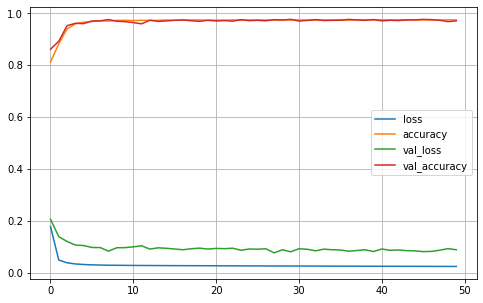

In [769]:
# 에포크가 끝날 때 마다의 train, valid set의 loss, 평가 지표
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True) # grid를 생성
#plt.gca().set_ylim(0,1) # 수직출의 범위를 0~1 사이로 설정
plt.show()

## 모델 평가

In [764]:
model.evaluate((X_valid,X_valid[:,wide_col]),y_valid)

291/291 [==============================] - 0s 2ms/step - loss: 0.0845 - accuracy: 0.9709


[0.08446627855300903, 0.9708977937698364]

In [777]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score, precision_score, accuracy_score

In [779]:
predicted = model.predict((X_valid, X_valid[:,wide_col])).round()
print(f"accuracy score : {accuracy_score(y_valid, predicted)}")
print(f"precision score : {precision_score(y_valid,predicted)}")
print(f"recall_score : {recall_score(y_valid, predicted)}")
print(f"confusion matrix : \n {confusion_matrix(y_valid, predicted)}")

accuracy score : 0.9711125429553265
precision score : 0.9763953774280797
recall_score : 0.99039780521262
confusion matrix : 
 [[1101  192]
 [  77 7942]]
